In [ ]:
from builtins import range
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from __future__ import print_function, division
from builtins import range, input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def relu(x):
  return x * (x > 0)


def error_rate(p, t):
  return np.mean(p != t)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/PCA/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


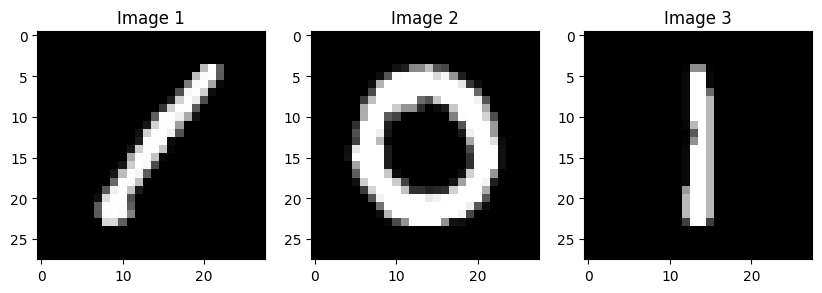

In [ ]:
first_three_images_pixels = data.iloc[:3, 1:].values.reshape((3, 28, 28))  # Assuming MNIST-like data with 28x28 pixels

# Plotting the first three images
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i in range(3):
    axes[i].imshow(first_three_images_pixels[i], cmap='gray')  # Using a grayscale colormap
    axes[i].set_title(f'Image {i+1}')

plt.show()

In [ ]:
def getKaggleMNIST():
    train = pd.read_csv('/content/drive/MyDrive/PCA/digit-recognizer/train.csv').values.astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000,1:] / 255
    Ytrain = train[:-1000,0].astype(np.int32)

    Xtest  = train[-1000:,1:] / 255
    Ytest  = train[-1000:,0].astype(np.int32)
    return Xtrain, Ytrain, Xtest, Ytest

In [ ]:
def init_weights(shape):
    w = np.random.randn(*shape) / np.sqrt(sum(shape))
    return w.astype(np.float32)

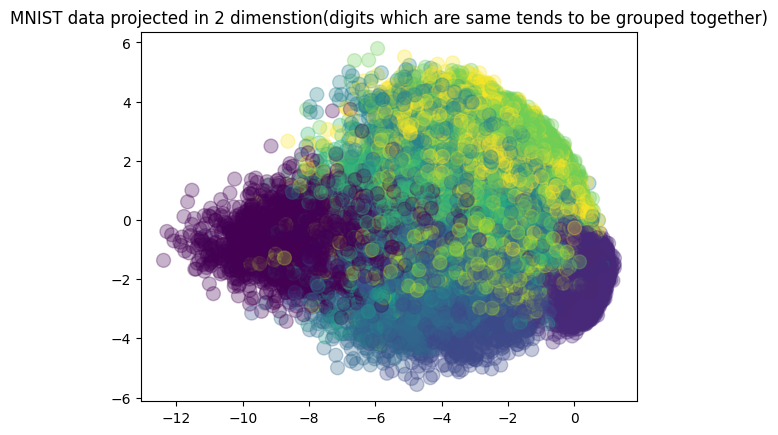

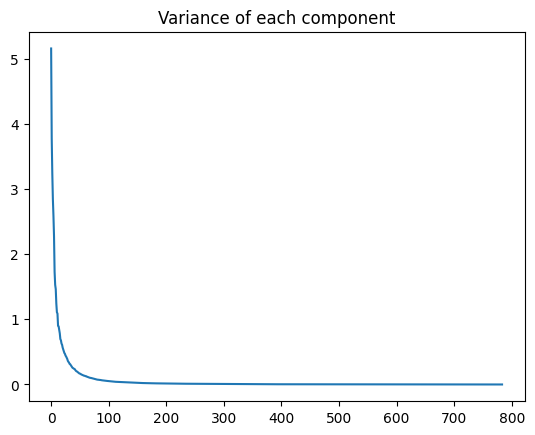

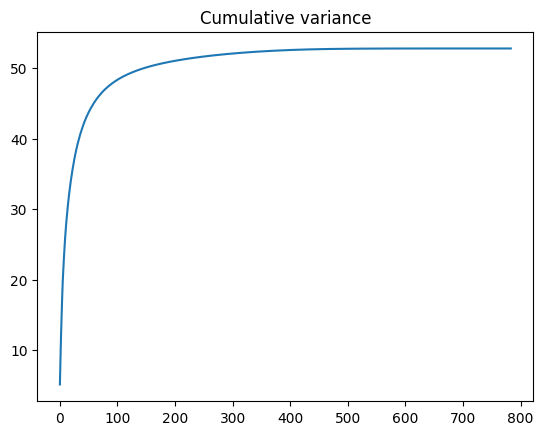

In [ ]:
#implementation without a function
from __future__ import print_function, division
from builtins import range, input
Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

# decompose covariance
covX = np.cov(Xtrain.T)
lambdas, Q = np.linalg.eigh(covX)


# lambdas are sorted from smallest --> largest
# some may be slightly negative due to precision
idx = np.argsort(-lambdas)
lambdas = lambdas[idx] # sort in proper order
lambdas = np.maximum(lambdas, 0) # get rid of negatives
Q = Q[:,idx]


# plot the first 2 columns of Z
Z = Xtrain.dot(Q)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Ytrain, alpha=0.3)

plt.title("MNIST data projected in 2 dimenstion(digits which are same tends to be grouped together)")
plt.show()


# plot variances
plt.plot(lambdas)
plt.title("Variance of each component")
plt.show()

# cumulative variance
plt.plot(np.cumsum(lambdas))
plt.title("Cumulative variance")
plt.show()

In [ ]:
#google collab link
#https://drive.google.com/drive/folders/1VkyaySewITLRDYJBdcyxCMSYXmWKNakq